In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("../Data/pharmacy_tx.csv")
df 

,tx_date,pharmacy,diagnosis,drug,bin,pcn,group,rejected,patient_pay
0,2022-01-02,Pharmacy #6,G99.93,branded tanoclolol,725700,1UQC,NaN,False,13.39
1,2022-01-02,Pharmacy #42,U60.52,branded oxasoted,664344,NaN,52H8KH0F83K,False,7.02
2,2022-01-02,Pharmacy #37,Q85.91,branded cupitelol,725700,1UQC,NaN,False,13.39
3,2022-01-02,Pharmacy #30,U60.52,generic oxasoted,571569,KB38N,6BYJBW,False,10.84
4,2022-01-02,Pharmacy #18,N55.01,branded mamate,664344,NaN,ZX2QUWR,False,47.00
...,...,...,...,...,...,...,...,...,...
13910239,2022-12-30,Pharmacy #42,U27.71,branded colifunene,322463,NaN,HO8HUGL,True,0.00
13910240,2022-12-30,Pharmacy #45,N59.44,generic tafistitrisin,664344,NaN,TFZOR5R49,False,6.28
13910241,2022-12-30,Pharmacy #54,W50.87,generic tanoclolol,691847,N098KI,6SP1DG,False,6.94
13910242,2022-12-30,Pharmacy #0,I68.27,branded prazinib,96934,S76J7V6,NaN,False,13.93


In [4]:
for header in df.columns:
    print(header, df[header].unique().shape)

tx_date (363,)
pharmacy (58,)
diagnosis (133,)
drug (114,)
bin (12,)
pcn (49,)
group (49,)
rejected (2,)
patient_pay (20437,)


In [5]:
for header in df.columns:
    print(header, df[header].isnull().sum())

tx_date 0
pharmacy 0
diagnosis 0
drug 0
bin 0
pcn 3626961
group 3909025
rejected 0
patient_pay 0


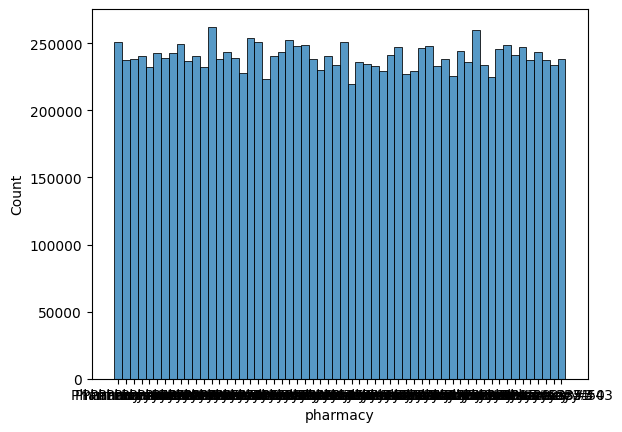

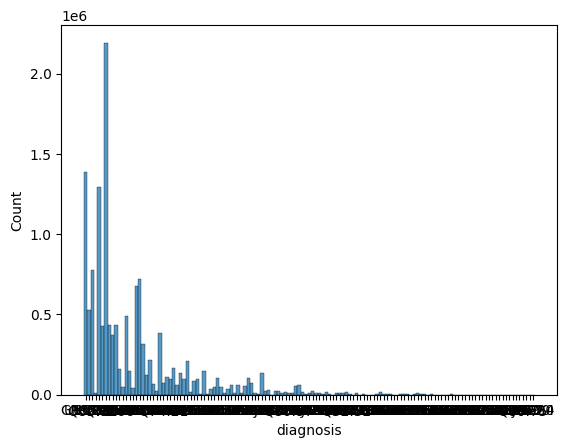

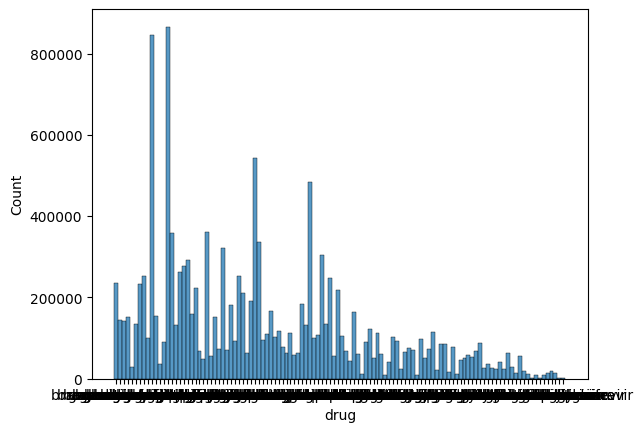

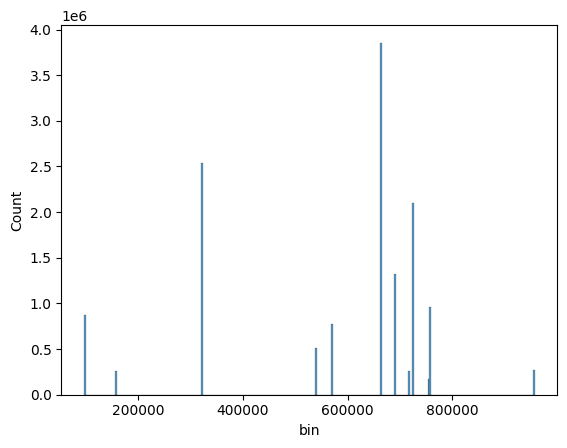

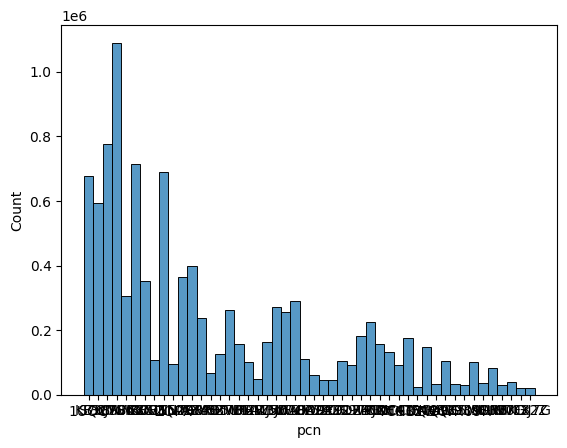

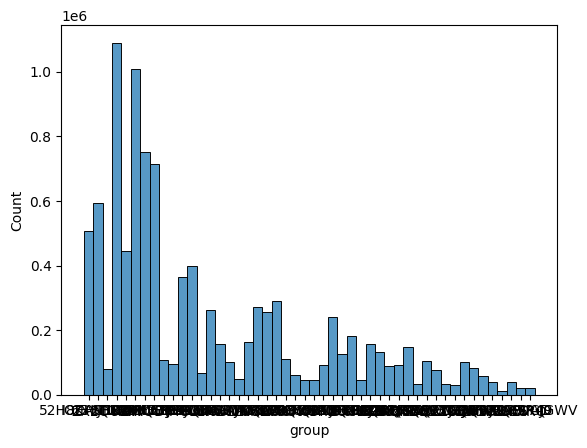

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


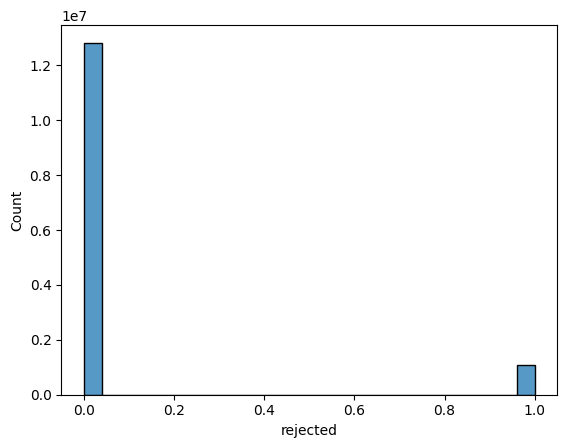

In [6]:
# Generate code to give histogram of each column of df except for the first column and last column

for header in df.columns[1:-1]:
    sns.histplot(df[header])
    plt.show()

In [12]:
# Patient pay statistics
df['patient_pay'].describe()



count    1.391024e+07
mean     2.406044e+01
std      3.952487e+01
min      0.000000e+00
25%      8.850000e+00
50%      1.326000e+01
75%      1.889000e+01
max      5.579300e+02
Name: patient_pay, dtype: float64

In [13]:
df_one_hot = pd.get_dummies(df, columns = df.columns[3:5])
df_one_hot


,tx_date,pharmacy,diagnosis,pcn,group,rejected,patient_pay,drug_branded antimab,drug_branded bovirol,drug_branded brede,...,bin_322463,bin_539437,bin_571569,bin_664344,bin_691847,bin_718350,bin_725700,bin_756120,bin_757349,bin_956971
0,2022-01-02,Pharmacy #6,G99.93,1UQC,NaN,False,13.39,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,2022-01-02,Pharmacy #42,U60.52,NaN,52H8KH0F83K,False,7.02,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2022-01-02,Pharmacy #37,Q85.91,1UQC,NaN,False,13.39,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,2022-01-02,Pharmacy #30,U60.52,KB38N,6BYJBW,False,10.84,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2022-01-02,Pharmacy #18,N55.01,NaN,ZX2QUWR,False,47.00,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13910239,2022-12-30,Pharmacy #42,U27.71,NaN,HO8HUGL,True,0.00,0,0,0,...,1,0,0,0,0,0,0,0,0,0
13910240,2022-12-30,Pharmacy #45,N59.44,NaN,TFZOR5R49,False,6.28,0,0,0,...,0,0,0,1,0,0,0,0,0,0
13910241,2022-12-30,Pharmacy #54,W50.87,N098KI,6SP1DG,False,6.94,0,0,0,...,0,0,0,0,1,0,0,0,0,0
13910242,2022-12-30,Pharmacy #0,I68.27,S76J7V6,NaN,False,13.93,0,0,0,...,0,0,0,0,0,0,0,0,0,0
